<a href="https://colab.research.google.com/github/Has-ava/Diabetes-risk-prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Télécharger le dataset depuis Kaggle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Charger les données dans un DataFrame
df = pd.read_csv(url, names=columns)

# Afficher les 5 premières lignes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Vérifier les valeurs manquantes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_normalize = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entraînement du modèle
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)

print(f"Accuracy (Régression Logistique) : {acc_log:.4f}")

Accuracy (Régression Logistique) : 0.7532


In [6]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Définition des modèles de base
base_models = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svm", SVC(probability=True, random_state=42))
]

# Modèle empilé
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Entraînement
stack_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_stack = stack_model.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"Accuracy (Stacking) : {acc_stack:.4f}")

Accuracy (Stacking) : 0.7597


In [7]:
from sklearn.metrics import classification_report

print("Régression Logistique :")
print(classification_report(y_test, y_pred))

print("Stacking :")
print(classification_report(y_test, y_pred_stack))

Régression Logistique :
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Stacking :
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



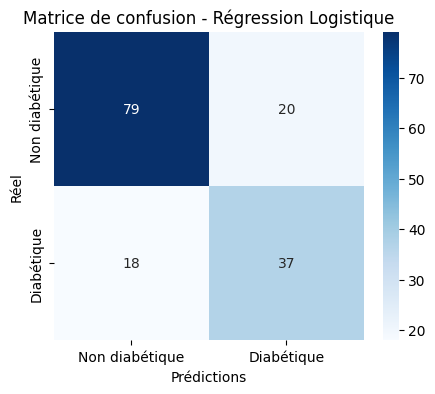

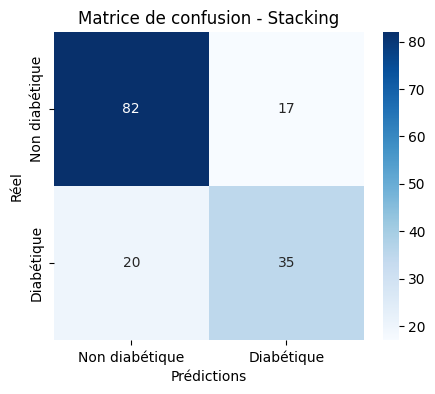

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non diabétique", "Diabétique"], yticklabels=["Non diabétique", "Diabétique"])
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

# Matrice pour la régression logistique
plot_conf_matrix(y_test, y_pred, "Régression Logistique")

# Matrice pour le modèle Stacking
plot_conf_matrix(y_test, y_pred_stack, "Stacking")

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [10]:
# Importation du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier

# Création du modèle avec les meilleurs paramètres trouvés
best_rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)

# Entraînement du modèle
best_rf.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_best_rf = best_rf.predict(X_test)

# Évaluation du modèle optimisé
from sklearn.metrics import classification_report

print("Rapport de classification (Random Forest optimisé) :")
print(classification_report(y_test, y_pred_best_rf))

Rapport de classification (Random Forest optimisé) :
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Liste des hyperparamètres à tester
param_grid = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
    {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}
]

best_model = None
best_score = 0

# Boucle pour tester plusieurs modèles
for params in param_grid:
    xgb = XGBClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        eval_metric="logloss",
        use_label_encoder=False
    )

    # Entraînement du modèle
    xgb.fit(X_train, y_train)

    # Évaluation
    y_pred = xgb.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']

    print(f"Test avec {params} - Accuracy: {accuracy:.4f}")

    # Garde le meilleur modèle
    if accuracy > best_score:
        best_score = accuracy
        best_model = xgb

# Affichage du meilleur modèle
print("\nMeilleur modèle :", best_model)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test avec {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1} - Accuracy: 0.6883


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test avec {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1} - Accuracy: 0.7403


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:42:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test avec {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05} - Accuracy: 0.7078

Meilleur modèle : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [14]:
from sklearn.metrics import classification_report

# Prédictions avec le meilleur modèle
y_pred_xgb_opt = best_model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred_xgb_opt))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154



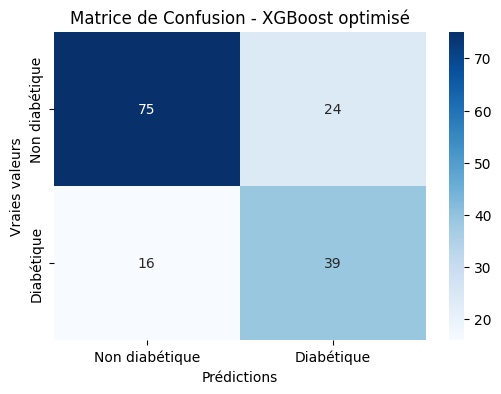

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_xgb_opt)

# Affichage avec seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non diabétique", "Diabétique"], yticklabels=["Non diabétique", "Diabétique"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - XGBoost optimisé")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

# Calcul des précisions
acc_rf_best = accuracy_score(y_test, y_pred_best_rf)

print(f"Accuracy (Régression Logistique) : {acc_log:.4f}")
print(f"Accuracy (Stacking) : {acc_stack:.4f}")
print(f"Accuracy (Random Forest optimisé) : {acc_rf_best:.4f}")

Accuracy (Régression Logistique) : 0.7532
Accuracy (Stacking) : 0.7597
Accuracy (Random Forest optimisé) : 0.7338
